**Healthy vs Diseased Leaf Classification (Binary)**

Import necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prepare ImageDataGenerator for image preprocessing and augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)


100%|██████████| 658M/658M [00:10<00:00, 67.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the paths for the healthy and unhealthy bell pepper images
healthy_dir = '/content/drive/MyDrive/plantdata/Pepper__bell___healthy'
unhealthy_dir = '/content/drive/MyDrive/plantdata/Pepper__bell___Bacterial_spot'

# Create the train and test directories
train_dir = '/content/drive/MyDrive/plantdata/train'
test_dir = '/content/drive/MyDrive/plantdata/test'

os.makedirs(os.path.join(train_dir, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'unhealthy'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'healthy'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'unhealthy'), exist_ok=True)

# Function to split the images into train and test
def split_dataset(src_dir, label, train_dir, test_dir, test_size=0.2):
    files = os.listdir(src_dir)
    # Split the dataset into train and test
    train_files, test_files = train_test_split(files, test_size=test_size)

    # Move files to the corresponding train and test directories
    for file in train_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(train_dir, label, file))
    for file in test_files:
        shutil.move(os.path.join(src_dir, file), os.path.join(test_dir, label, file))

# Split the healthy and unhealthy images
split_dataset(healthy_dir, 'healthy', train_dir, test_dir)
split_dataset(unhealthy_dir, 'unhealthy', train_dir, test_dir)

print("Dataset has been split into train and test directories.")


Dataset has been split into train and test directories.


Load training data


In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plantdata/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 1979 images belonging to 2 classes.


Prepare ImageDataGenerator for testing data preprocessing

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

Load testing data

In [ ]:
testing_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/plantdata/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 496 images belonging to 2 classes.


In [ ]:
# Build the CNN model
cnn = Sequential()


# Add Convolutional and MaxPooling layers

In [ ]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))


In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

Flatten the feature maps for Dense layers

In [ ]:
cnn.add(Flatten())

Add Dense layers

In [ ]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile the model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
cnn.fit(x=training_set, validation_data=testing_set, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 622s 9s/step - accuracy: 0.6177 - loss: 0.6277 - val_accuracy: 0.8004 - val_loss: 0.4104
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 475ms/step - accuracy: 0.8484 - loss: 0.3639 - val_accuracy: 0.8669 - val_loss: 0.3010
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 466ms/step - accuracy: 0.8590 - loss: 0.3269 - val_accuracy: 0.8992 - val_loss: 0.2525
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 31s 469ms/step - accuracy: 0.8924 - loss: 0.2629 - val_accuracy: 0.8972 - val_loss: 0.2200
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 460ms/step - accuracy: 0.9136 - loss: 0.2114 - val_accuracy: 0.8911 - val_loss: 0.2454
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 428ms/step - accuracy: 0.9292 - loss: 0.1902 - val_accuracy: 0.9194 - val_loss: 0.1892
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 460ms/step - accuracy: 0.9424 - loss: 0.1683 - val_accuracy: 0.8891 - val_loss: 0.2691
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 462ms/step - accuracy: 0.9485 - loss: 0.1439 - val_accuracy: 0.9637 

Save the trained model

In [ ]:
cnn.save('/content/drive/MyDrive/plantdata/model.h5')
print("Model saved to disk")

Model saved to disk


In [ ]:
# Predict a new image (example: from the test set)
test_image = tf.keras.utils.load_img('/content/drive/MyDrive/plantdata/unhealthybp.png', target_size=(64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

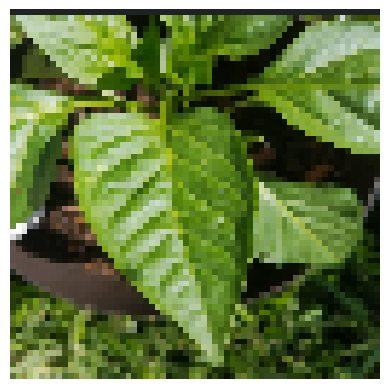

In [ ]:
# Display the image
import matplotlib.pyplot as plt
plt.imshow(test_image[0].astype('uint8'))  # Display the image (first element of the batch)
plt.axis('off')  # Hide axis
plt.show()


In [ ]:
# Predict the result
result = cnn.predict(test_image / 255.0)
prediction = 'Healthy' if result[0][0] <= 0.5 else 'Diseased'

print("Prediction:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: Diseased
